<h1 style="font-size:5rm;"> Temperature Sensor with Wireless Communication

## Members

Name | Affiliation | IEEE Member | SSCS Member
--------- | ------ | ------ | ------:
Hugo Dias Giló (hdg199@gmail.com) | Universidade Federal Rural do Semi-Árido | No | No
Francisco de Assis Brito Filho (brito.rn@gmail.com) | Universidade Federal Rural do Semi-Árido | Yes | Yes



## Overview

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; This work is about a temperature sensor with wireless transmission in the 2.4 GHz ISM band to measure human body temperature with the CMOS 130 nm technology and Skywater PDK. Its main objectives are: to work with simple circuit topologies to have a low energy consumption. 

## Block Diagram
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The main blocks are:
- Sensor: to detect the local temperature;
- Gain: to amplifier the sensor signals;
- Mixed signal: to convert analog signals to digital pulses.
- RF (RadioFrequency): to convert digital signals to RF signals and match them with a antenna.

<img src="https://user-images.githubusercontent.com/80465879/222283592-4b8c24cd-d419-403e-9cb8-2d1f8a096aee.png" width="800vh" >

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Its operation follows this block diagram. First, the PTAT sensor detects the current temperature and sends a DC voltage signal that passes through a Buffer and is amplified by the Miller OTA (Miller Operational Transconductance Amplifier). The amplified signal passes through another Buffer and is modulated by a Sigma-Delta to convert this DC signal into digital pulses, which can be understood as PDM (Pulse-Density Modulation). Subsequently, this digital signal is modulated by the ASK (Amplitude Shift-Keying) modulator. That will modulate the digital switching into underdamped 2.4 GHz signals, which can be transmitted by an antenna.The device to match the impedance, as well as the antenna and power supply (voltage and current sources) are external blocks to this work.

## Specs

Name | Value (at 35 °)
--------- | ------:
Vdd | 1.8 V
TC (Temperature Coeficient) | -2.22 mV/°C
Output offset | 1.2 V
Max error (20 - 50 °C) | 0.005 °C
Max error (-100 - 200 °C) | 0.07 °C
Potency | 1.5 mW
Area | 0.04 mm²


## Tools

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The tools used covered the basic stages of microelectronic circuit design and are entirely open source. To capture the schematic and generate the SPICE files, Xschem (V3.1.0) was used, which is linked to Ngspice (37+) to carry out the simulations and read these SPICE files. For the implementation of the layout, the Magic VLSI tool (8.3.329) was used, which generates the SPICE file with the RC extraction of parasites. The LVS (Layout Vs Schematic) was performed by Netgen (1.5.234).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In some blocks, it was necessary to build inductors through ASITIC (version X11R6), responsible for modeling square inductors by numerical methods that find their dimensions, aiming at the best quality factor. In addition to the possibility of generating files to compose the layout and the pi equivalent model to be used in simulations.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; First, the dependencies will be installed. Then three .spice files will be runned, one for each specific temperature value (10, 35 and 60 °C, respectively) to plot your graphics and finally, the layout of the complete device alone and implemented in the Caravel Harness will be shown.

## Installing Dependencies

In [4]:
# install all tools and dependencies
# clone repo 
# git clone https://github.com/hugodiasg/temp-sensor

import os
import pathlib
import sys

!pip install matplotlib pandas pyinstaller
!apt-get install -y ruby-full time build-essential
!apt install -f libqt4-designer libqt4-xml libqt4-sql libqt4-network libqtcore4 libqtgui4
!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
site_package_path = conda_prefix_path / 'lib/python3.7/site-packages'
sys.path.append(str(site_package_path.resolve()))
CONDA_PREFIX = str(conda_prefix_path.resolve())
PATH = os.environ['PATH']
LD_LIBRARY_PATH = os.environ.get('LD_LIBRARY_PATH', '')
%env CONDA_PREFIX={CONDA_PREFIX}
%env PATH={CONDA_PREFIX}/bin:{PATH}
%env LD_LIBRARY_PATH={CONDA_PREFIX}/lib:{LD_LIBRARY_PATH}
!bin/micromamba create --yes --prefix $CONDA_PREFIX
!echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel litex-hub \
                        --channel main \
                        open_pdks.sky130a \
                        magic \
                        netgen
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel conda-forge \
                        tcllib gdstk pyyaml click svgutils ngspice

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 43.1 MB/s eta 0:00:00m eta 0:00:01:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 651.0/651.0 KB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 KB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.7/255.7 KB 77.0 MB/s eta 0:00:00
E: Não foi possível abrir arquivo de trava /var/lib/dpkg/lock-frontend - open (13: Permissão negada)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
E: Não foi possível abrir arquivo de trava /var/lib/dpkg/lock-frontend - open (13: Permissão negada)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
bin/micromamba
env: CONDA_PREFIX=/home/

Linking open_pdks.sky130a-1.0.395_0_g815863e-20230225_164303
Linking _libgcc_mutex-0.1-main
Linking ld_impl_linux-64-2.38-h1181459_1
Linking libstdcxx-ng-11.2.0-h1234567_1
Linking ca-certificates-2023.01.10-h06a4308_0
Linking libgomp-11.2.0-h1234567_1
Linking _openmp_mutex-5.1-1_gnu
Linking libgcc-ng-11.2.0-h1234567_1
Linking icu-58.2-he6710b0_3
Linking libuuid-1.41.5-h5eee18b_0
Linking expat-2.4.9-h6a678d5_0
Linking pixman-0.40.0-h7f8727e_1
Linking xz-5.2.10-h5eee18b_1
Linking openssl-1.1.1t-h7f8727e_0
Linking ncurses-6.4-h6a678d5_0
Linking pcre-8.45-h295c915_0
Linking libffi-3.4.2-h6a678d5_6
Linking libxcb-1.15-h7f8727e_0
Linking zlib-1.2.13-h5eee18b_0
Linking readline-8.2-h5eee18b_0
Linking libxml2-2.9.14-h74e7548_0
Linking glib-2.69.1-he621ea3_2
Linking libpng-1.6.37-hbc83047_0
Linking tk-8.6.12-h1ccaba5_0
Linking sqlite-3.40.1-h5082296_0
Linking freetype-2.12.1-h4a9f257_0
Linking python-3.7.16-h7a1cb2a_0
Linking fontconfig-2.14.1-h52c9d5c_1
Linking certifi-2022.12.7-py37h06a4308_0

Extracting       ━━━━━━━━━━━━━━━━━━━━━━━       0                            0.0s[+] 0.1s
Extracting       ━━━━━━━━━━━━━━━━━━━━━━━       0                            0.0s[+] 0.2s
Extracting       ━━━━━━━━━━━━━━━━━━━━━━━       0                            0.0s[+] 0.3s
Extracting       ━━━━━━━━━━━━━━━━━━━━━━━       0                            0.0s[+] 0.4s
Extracting       ━━━━━━━━━━━━━━━━━━━━━━━       0                            0.0slibuuid                                             28.3kB @  56.7kB/s  0.5s
[+] 0.5s
Extracting   (1) ━━━━━━━━━━━━━━╸━━━━━━━━       0 libuuid                    0.0slibxslt                                            581.4kB @   1.1MB/s  0.6s
pixman                                             607.8kB @   1.1MB/s  0.6s
[+] 0.6s
Extracting   (2) ━━━━━━━━━━━━━━━╸━━━━━━━       1 libxslt                    0.1sngspice-lib                                          3.1MB @   4.5MB/s  0.7s
fontconfig                                         312.0kB @ 454.9kB/s  0.2s
[

Linking zipp-3.15.0-pyhd8ed1ab_0
Linking svgutils-0.3.4-pyhd8ed1ab_0
Linking importlib-metadata-4.11.4-py37h89c1867_0
Linking click-8.1.3-py37h89c1867_0
Transaction finished


In [3]:
import os

DIR=os.getcwd().replace("/jupyter-notebook",'')
DEVICE_DIR=DIR+"/device-complete/xschem/simulation"

In [1]:
# Spice file to 10 °C
!ngspice -b ../device-complete/xschem/simulation/device-complete-tb.spice



Note: Compatibility modes selected: hs a



Circuit: ** sch_path: /home/hugodg/projects-sky130/temp-sensor/device-complete/xschem/device-complete-tb.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 10.000000 and TNOM = 27.000000


Note: Starting dynamic gmin stepping
Trying gmin =   1.0000E-03 Note: One successful gmin step
Trying gmin =   1.0000E-04 Note: One successful gmin step
Trying gmin =   1.0000E-05 Note: One successful gmin step
Trying gmin =   1.0000E-06 Note: One successful gmin step
Trying gmin =   1.0000E-07 Note: One successful gmin step
Trying gmin =   1.0000E-08 Note: One successful gmin step
Trying gmin =   1.0000E-09 Note: One successful gmin step
Trying gmin =   1.0000E-10 Note: One successful gmin step
Trying gmin =   1.0000E-11 Note: One successful gmin step
Trying gmin =   1.0000E-12 Note: One successful gmin step
Trying gmin =   1.0000E-12 Note: One successful gmin step

Note: Starting true gmin stepping
Trying 

 Reference value :  9.99915e-05
No. of Data Rows : 2512006
pot_avg             =  9.789065e-04 from=  0.000000e+00 to=  5.000000e-06
FFT: Time span: 0.0001 s, input length: 2500001, zero padding: 1694303
FFT: Frequency resolution: 10000 Hz, output length: 2097153
Note: No ".plot", ".print", or ".fourier" lines; no simulations run


In [3]:
# Spice file to 35 °C
!ngspice -b ../device-complete/xschem/simulation/device-complete-tb2.spice


Note: Compatibility modes selected: hs a



Circuit: ** sch_path: /home/hugodg/projects-sky130/temp-sensor/device-complete/xschem/device-complete-tb2.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 35.000000 and TNOM = 27.000000


Note: Starting dynamic gmin stepping
Trying gmin =   1.0000E-03 Note: One successful gmin step
Trying gmin =   1.0000E-04 Note: One successful gmin step
Trying gmin =   1.0000E-05 Note: One successful gmin step
Trying gmin =   1.0000E-06 Note: One successful gmin step
Trying gmin =   1.0000E-07 Note: One successful gmin step
Trying gmin =   1.0000E-08 Note: One successful gmin step
Trying gmin =   1.0000E-09 Note: One successful gmin step
Trying gmin =   1.0000E-10 Note: One successful gmin step
Trying gmin =   1.0000E-11 Note: One successful gmin step
Trying gmin =   1.0000E-12 Note: One successful gmin step
Trying gmin =   1.0000E-12 Note: One successful gmin step

Note: Starting true gmin stepping
Trying

 Reference value :  8.99895e-05
No. of Data Rows : 2260806
pot_avg             =  9.535158e-04 from=  0.000000e+00 to=  5.000000e-06
FFT: Time span: 9e-05 s, input length: 2250001, zero padding: 1944303
FFT: Frequency resolution: 11111.1 Hz, output length: 2097153
Note: No ".plot", ".print", or ".fourier" lines; no simulations run


In [4]:
# Spice file to 60 °C
!ngspice -b ../device-complete/xschem/simulation/device-complete-tb3.spice


Note: Compatibility modes selected: hs a



Circuit: ** sch_path: /home/hugodg/projects-sky130/temp-sensor/device-complete/xschem/device-complete-tb3.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 60.000000 and TNOM = 27.000000


Note: Starting dynamic gmin stepping
Trying gmin =   1.0000E-03 Note: One successful gmin step
Trying gmin =   1.0000E-04 Note: One successful gmin step
Trying gmin =   1.0000E-05 Note: One successful gmin step
Trying gmin =   1.0000E-06 Note: One successful gmin step
Trying gmin =   1.0000E-07 Note: One successful gmin step
Trying gmin =   1.0000E-08 Note: One successful gmin step
Trying gmin =   1.0000E-09 Note: One successful gmin step
Trying gmin =   1.0000E-10 Note: One successful gmin step
Trying gmin =   1.0000E-11 Warning: Further gmin increment
Trying gmin =   5.6234E-11 Note: One successful gmin step
Trying gmin =   2.3714E-11 Note: One successful gmin step
Trying gmin =   6.4938E-12 Note: One suc

 Reference value :  8.99989e-05
No. of Data Rows : 2260807
pot_avg             =  9.296546e-04 from=  0.000000e+00 to=  5.000000e-06
FFT: Time span: 9e-05 s, input length: 2250001, zero padding: 1944303
FFT: Frequency resolution: 11111.1 Hz, output length: 2097153
Note: No ".plot", ".print", or ".fourier" lines; no simulations run


In [5]:
!ngspice -b ../device-complete/xschem/simulation/device-complete_temp-tb\ .spice


Note: Compatibility modes selected: hs a



Circuit: ** sch_path: /home/hugodg/projects-sky130/temp-sensor/device-complete/xschem/device-complete_temp-tb

option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000



Note: Starting dynamic gmin stepping
Trying gmin =   1.0000E-03 Note: One successful gmin step
Trying gmin =   1.0000E-04 Note: One successful gmin step
Trying gmin =   1.0000E-05 Warning: Further gmin increment
Trying gmin =   5.6234E-05 Note: One successful gmin step
Trying gmin =   2.3714E-05 Note: One successful gmin step
Trying gmin =   6.4938E-06 Note: One successful gmin step
Trying gmin =   9.3057E-07 Note: One successful gmin step
Trying gmin =   9.3057E-08 Note: One successful gmin step
Trying gmin =   9.3057E-09 Note: One successful gmin step
Trying gmin =   9.3057E-10 Note: One successful gmin step
Trying gmin =   9.3057E-11 Note: One successful gmin step
Trying gmin =   9.3057E-12 Note: One su

Error: Transient op failed, timestep too small

doAnalyses: DC:  Timestep too small;  temp = 217: cause unrecorded.


dc simulation(s) aborted
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Note: No ".plot", ".print", or ".fourier" lines; no simulations run


## Graphics

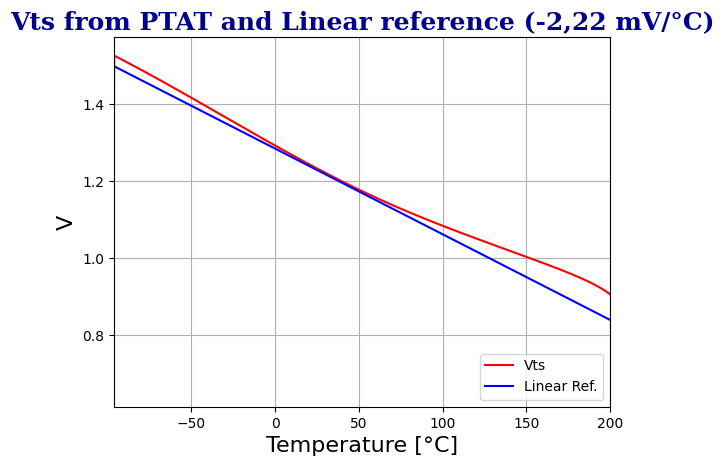

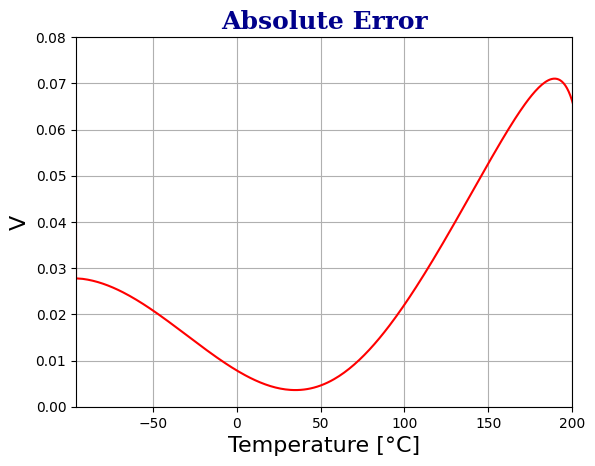

In [22]:
import pandas as pd
import numpy as np
#=========================================================== Temperature Sweep
data = pd.read_csv('./temp-sweep.txt',sep='\s+',header=None)
data = pd.DataFrame(data)

import matplotlib.pyplot as plt


x = data[0]
vts = data[1]
v_lin=data[2]
err=data[3]

plt.xlim(-96,200)
plt.plot(x,vts,'r',label='Vts')
plt.plot(x,v_lin,'b', label='Linear Ref.')
plt.legend(['Vts', 'Linear Ref.'], loc='lower right')
plt.xlabel("Temperature [°C]", size = 16)
plt.ylabel("V", size = 16)
plt.title("Vts from PTAT and Linear reference (-2,22 mV/°C)", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
plt.grid(True)

plt.show()

plt.xlim(-96,200)
plt.ylim(0,0.08)
plt.plot(x,err,'r')
plt.xlabel("Temperature [°C]", size = 16)
plt.ylabel("V", size = 16)

plt.title("Absolute Error", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

plt.grid(True)

plt.show()

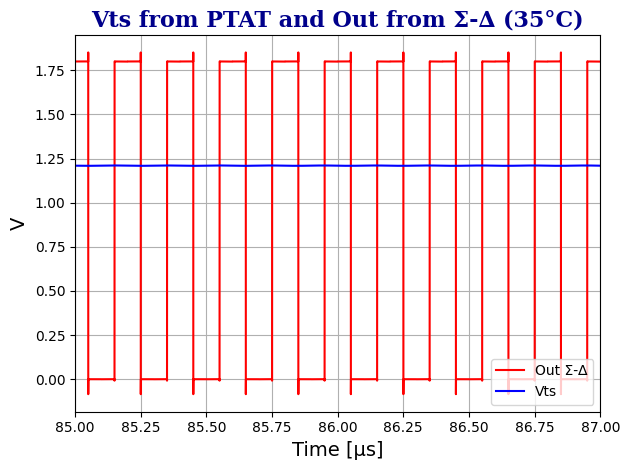

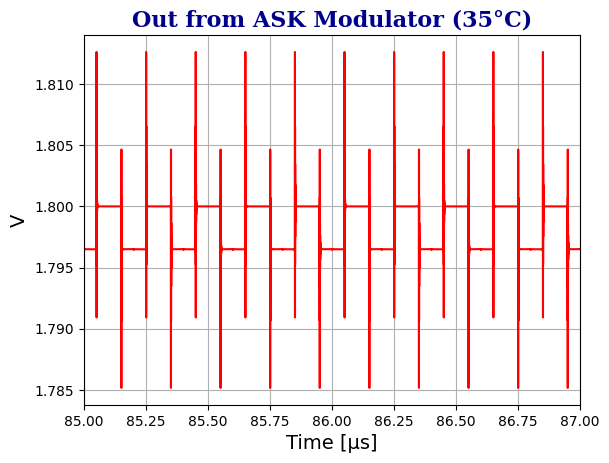

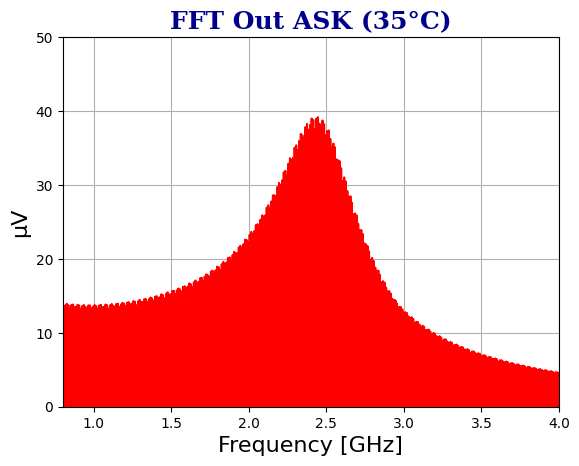

In [10]:
import pandas as pd
import numpy as np

#=========================================================== Transient data to 35 °C
data = pd.read_csv('./tran35.txt',sep='\s+',header=None)
data = pd.DataFrame(data)

t0=85
t1=87
import matplotlib.pyplot as plt
x = data[0]*1e6

# x in seconds to x in us
vts = data[1]
out_sigma = data[2]
out_ask = data[3]


plt.xlim(t0,t1)
plt.plot(x,out_sigma,'r',label='Out Σ-∆')
plt.plot(x,vts,'b', label='Vts')
plt.legend(['Out Σ-∆', 'Vts'], loc='lower right')
plt.xlabel("Time [μs]", size = 14,)
plt.ylabel("V", size = 14)
plt.title("Vts from PTAT and Out from Σ-∆ (35°C)", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 16})
plt.grid(True)
plt.tight_layout()

plt.show()

plt.xlim(t0,t1)
plt.plot(x,out_ask,'r',label='Out ASK Modulator')
plt.xlabel("Time [μs]", size = 14,)
plt.ylabel("V", size = 14)
plt.title("Out from ASK Modulator (35°C)", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 16})
plt.grid(True)

plt.show()

#=========================================================== FFT data to 35 °C

data = pd.read_csv('./fft35.txt',sep='\s+',header=None)
data = pd.DataFrame(data)

import matplotlib.pyplot as plt
x = data[0]*1e-9

# x in seconds to x in us
out_ask = data[1]*1e6

plt.xlim(0.8,4)
plt.ylim(0,50)
plt.plot(x, out_ask,'r')
plt.xlabel("Frequency [GHz]", size = 16,)
plt.ylabel("μV", size = 16)

plt.title("FFT Out ASK (35°C)", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

plt.grid(True)


plt.show()

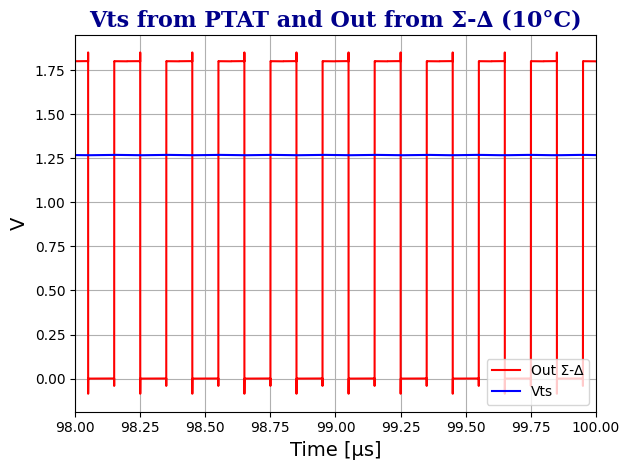

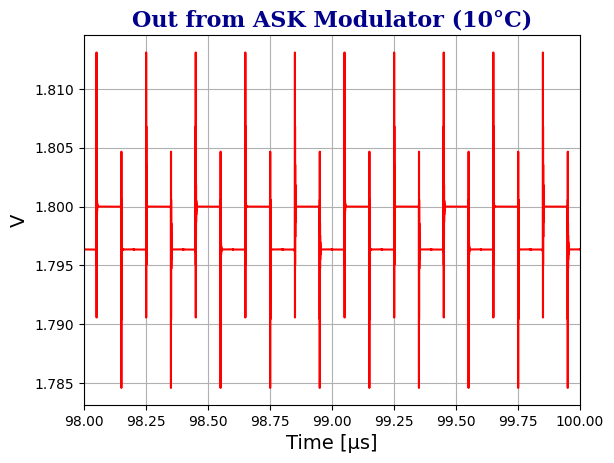

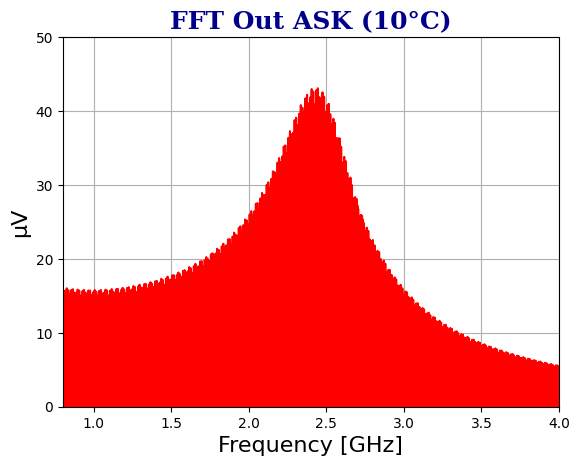

In [6]:
import pandas as pd
import numpy as np

#=========================================================== Transient data to 10 °C
data = pd.read_csv('./tran10.txt',sep='\s+',header=None)
data = pd.DataFrame(data)

t0=98
t1=100
import matplotlib.pyplot as plt
plt.subplots_adjust(wspace=0.5, hspace=0.5)
x = data[0]*1e6

# x in seconds to x in us
vts = data[1]
out_sigma = data[2]
out_ask = data[3]


plt.xlim(t0,t1)
plt.plot(x,out_sigma,'r',label='Out Σ-∆')
plt.plot(x,vts,'b', label='Vts')
plt.legend(['Out Σ-∆', 'Vts'], loc='lower right')
plt.xlabel("Time [μs]", size = 14,)
plt.ylabel("V", size = 14)
plt.title("Vts from PTAT and Out from Σ-∆ (10°C)", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 16})
plt.grid(True)
plt.tight_layout()

plt.show()

plt.xlim(t0,t1)
plt.plot(x,out_ask,'r',label='Out ASK Modulator')
plt.xlabel("Time [μs]", size = 14,)
plt.ylabel("V", size = 14)
plt.title("Out from ASK Modulator (10°C)", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 16})
plt.grid(True)

plt.show()

#=========================================================== FFT data to 10 °C

data = pd.read_csv('./fft10.txt',sep='\s+',header=None)
data = pd.DataFrame(data)

import matplotlib.pyplot as plt
x = data[0]*1e-9

# x in seconds to x in us
out_ask = data[1]*1e6

plt.xlim(0.8,4)
plt.ylim(0,50)
plt.plot(x, out_ask,'r')
plt.xlabel("Frequency [GHz]", size = 16,)
plt.ylabel("μV", size = 16)

plt.title("FFT Out ASK (10°C)", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

plt.grid(True)

plt.show()

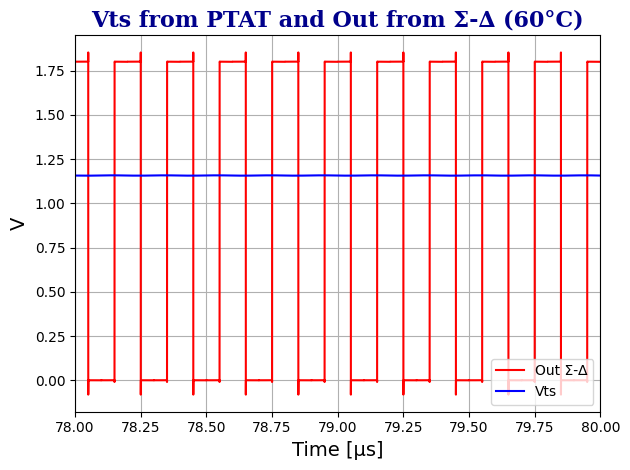

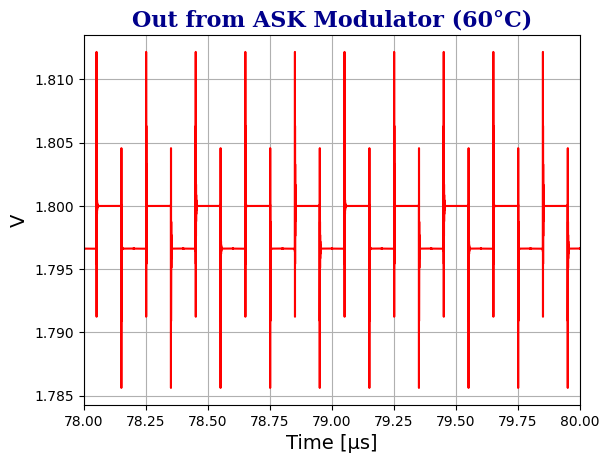

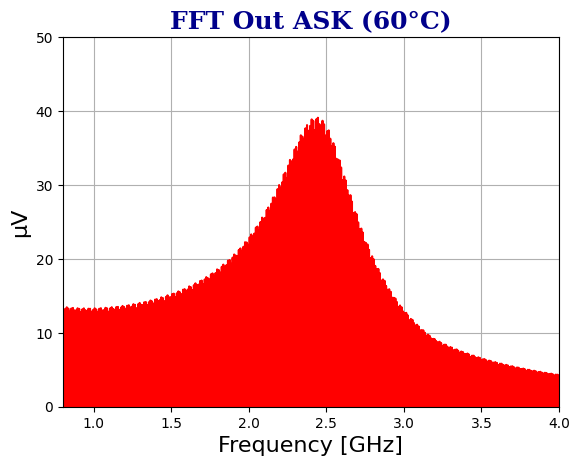

In [50]:
import pandas as pd
import numpy as np

#=========================================================== Transient data to 60 °C
data = pd.read_csv('./tran60.txt',sep='\s+',header=None)
data = pd.DataFrame(data)

t0=78
t1=80
import matplotlib.pyplot as plt
x = data[0]*1e6

# x in seconds to x in us
vts = data[1]
out_sigma = data[2]
out_ask = data[3]


plt.xlim(t0,t1)
plt.plot(x,out_sigma,'r',label='Out Σ-∆')
plt.plot(x,vts,'b', label='Vts')
plt.legend(['Out Σ-∆', 'Vts'], loc='lower right')
plt.xlabel("Time [μs]", size = 14,)
plt.ylabel("V", size = 14)
plt.title("Vts from PTAT and Out from Σ-∆ (60°C)", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 16})
plt.grid(True)
plt.tight_layout()

plt.show()

plt.xlim(t0,t1)
plt.plot(x,out_ask,'r',label='Out ASK Modulator')
plt.xlabel("Time [μs]", size = 14,)
plt.ylabel("V", size = 14)
plt.title("Out from ASK Modulator (60°C)", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 16})
plt.grid(True)

plt.show()

#=========================================================== FFT data to 60 °C

data = pd.read_csv('./fft60.txt',sep='\s+',header=None)
data = pd.DataFrame(data)

import matplotlib.pyplot as plt
x = data[0]*1e-9

# x in seconds to x in us
out_ask = data[1]*1e6

plt.xlim(0.8,4)
plt.ylim(0,50)
plt.plot(x, out_ask,'r')
plt.xlabel("Frequency [GHz]", size = 16,)
plt.ylabel("μV", size = 16)

plt.title("FFT Out ASK (60°C)", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

plt.grid(True)

plt.show()

## Layout

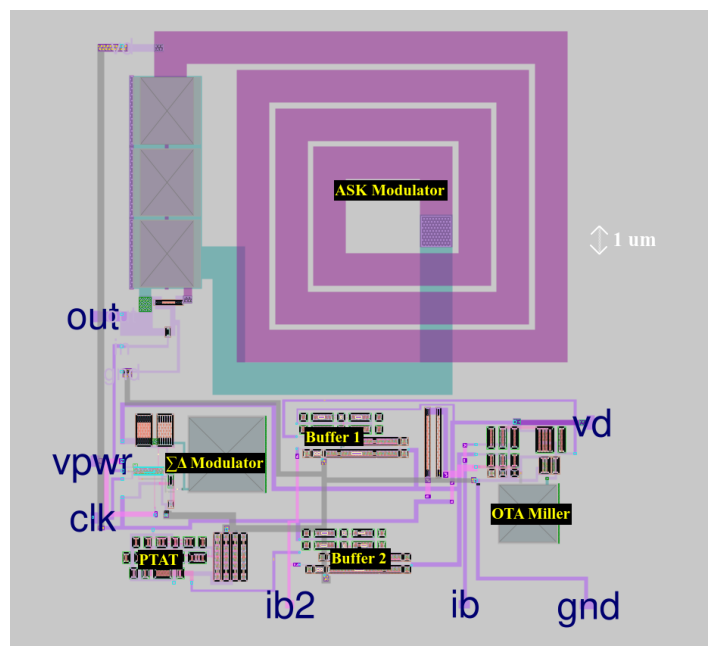

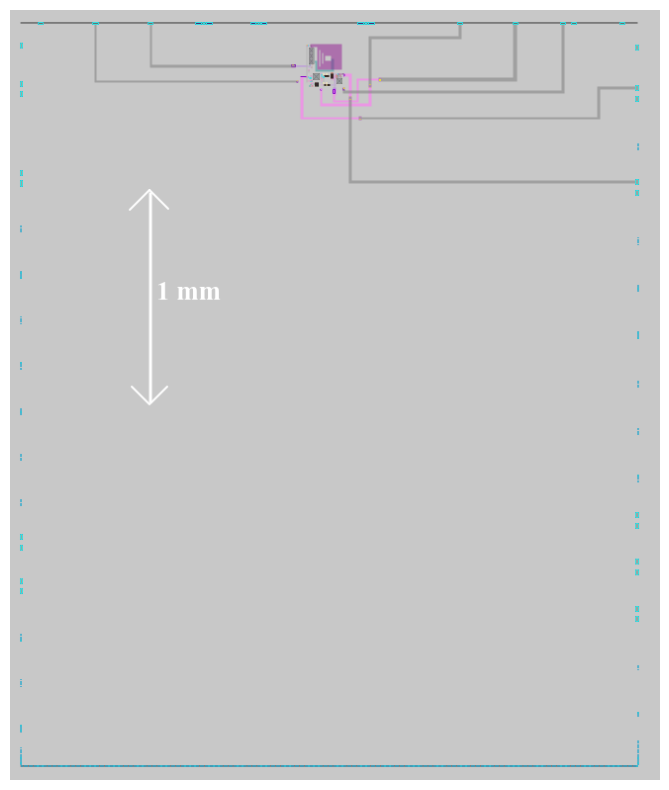

In [21]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the PNG file
device_complete_png = Image.open('./img/device-complete.png')

# Show the image
fig, ax = plt.subplots(figsize=(9, 9))
plt.imshow(device_complete_png)
plt.axis('off')
# Display the image
plt.show()

# Open the PNG file of user analog wrapper
user_wrapper_png = Image.open('./img/user_wrapper.png')

# Show the image
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(user_wrapper_png)
plt.axis('off')

# Display the image
plt.show()

## Pins Table

| Função |      Pino      |
|:------:|:--------------:|
|   vd   |     vdda1      |
|  vpwr  |     vccd1      |
|  gnd   |     vssa1      |
|   ib   | io_analog\[2\] |
|  ib2   | io_analog\[3\] |
|  clk   | io_analog\[8\] |
|  out   | io_analog\[7\] |

